<div style="background-color: lightgreen; padding: 18px;">
    <h1> Projeto| Estatística I
</div>

### Esse projeto visa a aplicação dos conceitos e ferramental da Estatística desenvolvidos nesse módulo

###

In [1]:
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

###
##### Para o desenvolvimento das atividades abaixo, o seu grupo pode escolher qualquer dataset que contenha uma coluna com valores inteiros.

In [2]:
df = pd.read_csv("athlete_events.csv")

In [3]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


###

__1) Em algum dataset, classifique as suas colunas em Quantitativa Discreta, Quantitiva Contínua, Qualitativa Ordinal ou Qualitativa Nominal.__


- **ID:** Qualitativa nominal
- **Name:** Qualitativa nominal
- **Sex:** Qualitativa nominal
- **Age:** Quantitativa discreta
- **Height:** Quantitativa contínua
- **Weight:** Quantitativa contínua
- **Team:** Qualitativa nominal
- **NOC:** Qualitativa nominal
- **Games:** Qualitativa ordinal
- **Year:** Qualitativa ordinal
- **Season:** Qualitativa ordinal
- **City:** Qualitativa nominal
- **Sport:** Qualitativa nominal
- **Event:** Qualitativa nominal
- **Medal:** Qualitativa ordinal

###

__2) Com o mesmo dataset, construir a distribuição de probabilidade de uma feature com valores inteiros. Escrever uma função para calcular a Esperança e outra função para calcular a Variância dessa variável aleatória. Compare o resultado de sua função com os resultados de alguma nativa do Python (há muitos módulos/bibliotecas que calculam esses parâmetros). Construa uma função que faça o papel da cdf() e outra função com o papel da sf(). Desafio extra: construir funções que fazem o papel da ppf() e da isf() .__'.f'.

In [4]:
distribuicao_frequencias = df["Age"].value_counts().sort_index()

print("Distribuição de frequências")
display(distribuicao_frequencias)

Distribuição de frequências


Age
10.0      1
11.0     13
12.0     39
13.0    187
14.0    837
       ... 
81.0      2
84.0      1
88.0      3
96.0      1
97.0      1
Name: count, Length: 74, dtype: int64

In [5]:
distribuicao_probabilidades = distribuicao_frequencias / distribuicao_frequencias.sum()

print("Distribuição de probabilidades")
display(distribuicao_probabilidades)

Distribuição de probabilidades


Age
10.0    0.000004
11.0    0.000050
12.0    0.000149
13.0    0.000715
14.0    0.003199
          ...   
81.0    0.000008
84.0    0.000004
88.0    0.000011
96.0    0.000004
97.0    0.000004
Name: count, Length: 74, dtype: float64

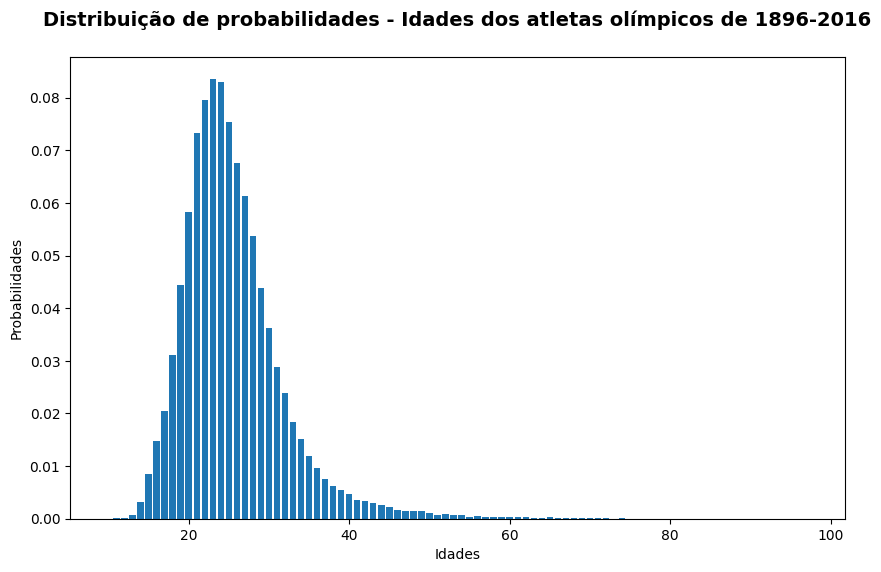

In [6]:
plt.figure(figsize=(10,6))
plt.bar(distribuicao_probabilidades.index, distribuicao_probabilidades.values)

plt.title('Distribuição de probabilidades - Idades dos atletas olímpicos de 1896-2016', fontweight=1000, fontsize=14, y=1.05)
plt.xlabel('Idades')
plt.ylabel('Probabilidades')

plt.show()

In [7]:
X = distribuicao_probabilidades.index
p = distribuicao_probabilidades.values

In [8]:
# funções esperança e variância
def esperanca(X, p):
    return sum(xi * pi for xi, pi in zip(X, p))
 
def variancia(X, p):
    return esperanca([xi ** 2 for xi in X], p) - esperanca(X, p) ** 2

esp = esperanca(X, p)
var = variancia(X, p)

# comparando resultados (funções esperança e variância x numpy)
print(f"""Comparando os resultados:

Esperança {round(esp, 2)} (Python)
Variância {round(var, 2)} (Python)

Esperança {np.round(np.dot(X, p), 2)} (NumPy)
Variância {np.round(np.dot(np.power(X, 2), p) - np.power(np.dot(X, p), 2), 2)} (NumPy)""")

Comparando os resultados:

Esperança 25.56 (Python)
Variância 40.88 (Python)

Esperança 25.56 (NumPy)
Variância 40.88 (NumPy)


In [9]:
# funções cdf, sf, ppf e isf
def cdf(X, p, xi):
    acum = 0
    for i, el in enumerate(sorted(X)):
        if el <= xi:
            acum += p[i]
        else:
            break
    
    return acum

def sf(X, p, xi):
    return 1 - cdf(X, p, xi)

def ppf(X, p, pi):
    z_proximo = 0
    acum = 0
    for i, el in enumerate(p):
        acum += el
        if acum <= pi:
            z_proximo = X[i]
        else:
            break

    return z_proximo

def isf(X, p, pi):
    p = p[::-1]
    X = X[::-1]
    z_proximo = 0
    acum = 1
    for i, el in enumerate(p):
        acum -= el
        if acum >= pi:
            z_proximo = X[i]
        else:
            break
    
    return z_proximo

# comparando resultados (funções cdf, sf, ppf e isf x scipy)
print(f"""Comparando os resultados:

cdf {cdf(X, p, 25)} (Python)
sf {sf(X, p, 25)} (Python)
ppf {ppf(X, p, 0.5765167671856964)} (Python)
isf {isf(X, p, 0.42348323281430356)} (Python)

cdf {stats.rv_discrete(values=(X, p)).cdf(25)} (SciPy)
sf {stats.rv_discrete(values=(X, p)).sf(25)} (SciPy)
ppf {stats.rv_discrete(values=(X, p)).ppf(0.5765167671856964)} (SciPy)
isf {stats.rv_discrete(values=(X, p)).isf(0.42348323281430356)} (SciPy)""")

Comparando os resultados:

cdf 0.5765167671856964 (Python)
sf 0.42348323281430356 (Python)
ppf 25.0 (Python)
isf 25.0 (Python)

cdf 0.5765167671856964 (SciPy)
sf 0.42348323281430356 (SciPy)
ppf 25.0 (SciPy)
isf 25.0 (SciPy)


###

 __3) Utilizando a variável aleatória do exercício anterior, construir a distribuição das médias amostrais para ilustrar/comprovar o Teorema do Limite Central. Comparar a média e a variância com o exercício anterior. Utilizar o teste de normalidade para verificar se essa distribuição (das médias amostrais) é normal ou  não.__


In [10]:
n = 500
n_amostras = 3000
amostra = [df["Age"].sample(n).reset_index(drop=True) for i in range(n_amostras)]
amostras = pd.concat(amostra, axis=1)
amostras.columns = [f"Amostra {(i + 1)}" for i in range(n_amostras)]

In [11]:
amostras

,Amostra 1,Amostra 2,Amostra 3,Amostra 4,Amostra 5,Amostra 6,Amostra 7,Amostra 8,Amostra 9,Amostra 10,...,Amostra 2991,Amostra 2992,Amostra 2993,Amostra 2994,Amostra 2995,Amostra 2996,Amostra 2997,Amostra 2998,Amostra 2999,Amostra 3000
0,37.0,20.0,25.0,20.0,NaN,24.0,20.0,26.0,25.0,20.0,...,25.0,27.0,29.0,18.0,24.0,28.0,27.0,20.0,33.0,23.0
1,24.0,21.0,20.0,32.0,26.0,27.0,NaN,26.0,50.0,31.0,...,31.0,29.0,30.0,NaN,22.0,24.0,20.0,20.0,29.0,28.0
2,20.0,25.0,23.0,22.0,19.0,26.0,28.0,22.0,34.0,32.0,...,32.0,21.0,25.0,33.0,14.0,28.0,NaN,30.0,29.0,32.0
3,23.0,22.0,27.0,29.0,20.0,24.0,25.0,27.0,NaN,30.0,...,24.0,23.0,20.0,20.0,24.0,23.0,25.0,26.0,20.0,21.0
4,29.0,21.0,24.0,21.0,26.0,32.0,26.0,17.0,27.0,19.0,...,18.0,21.0,30.0,21.0,23.0,20.0,22.0,19.0,25.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18.0,25.0,21.0,23.0,20.0,21.0,18.0,20.0,27.0,25.0,...,23.0,20.0,28.0,34.0,19.0,18.0,22.0,30.0,NaN,51.0
496,21.0,25.0,34.0,28.0,26.0,33.0,23.0,25.0,36.0,34.0,...,26.0,19.0,23.0,26.0,NaN,39.0,26.0,26.0,16.0,NaN
497,29.0,21.0,22.0,25.0,20.0,30.0,28.0,31.0,30.0,23.0,...,28.0,24.0,26.0,53.0,24.0,28.0,21.0,29.0,33.0,22.0
498,23.0,24.0,28.0,18.0,28.0,20.0,34.0,45.0,21.0,39.0,...,26.0,NaN,26.0,NaN,26.0,27.0,26.0,33.0,26.0,20.0


In [12]:
amostras.mean()

Amostra 1       25.822314
Amostra 2       25.452479
Amostra 3       25.742678
Amostra 4       25.848233
Amostra 5       25.493750
                  ...    
Amostra 2996    25.113402
Amostra 2997    25.694845
Amostra 2998    25.503080
Amostra 2999    25.335404
Amostra 3000    25.411157
Length: 3000, dtype: float64

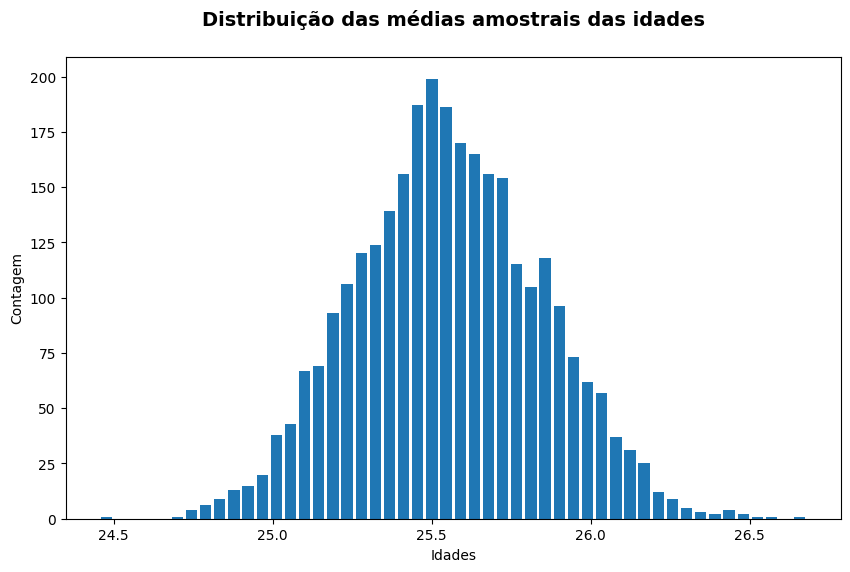

In [13]:
plt.figure(figsize=(10,6)) 
plt.hist(amostras.mean(), bins=50, rwidth=0.8)

plt.title('Distribuição das médias amostrais das idades', fontweight=1000, fontsize=14, y=1.05)
plt.xlabel('Idades')
plt.ylabel('Contagem')

plt.show()

In [14]:
print(f"""Comparação da média e desvio padrão da população e amostras:

Média (esperança) da população: {esp}
Média das amostras: {amostras.mean().mean()}
Desvio padrão da população: {math.sqrt(var)}
Desvio padrão das amostras: {amostras.std().mean()}

Verificando a afirmação do Teorema do Limite Central:

Desvio padrão das médias amostrais: {amostras.mean().std()}
Desvio padrão populacional / Raiz quadrada do tamanho da amostra: {math.sqrt(var) / math.sqrt(n)}""")

Comparação da média e desvio padrão da população e amostras:

Média (esperança) da população: 25.556898357297378
Média das amostras: 25.55236517798748
Desvio padrão da população: 6.393548628877127
Desvio padrão das amostras: 6.381853801826752

Verificando a afirmação do Teorema do Limite Central:

Desvio padrão das médias amostrais: 0.2947454310744812
Desvio padrão populacional / Raiz quadrada do tamanho da amostra: 0.28592818703239664


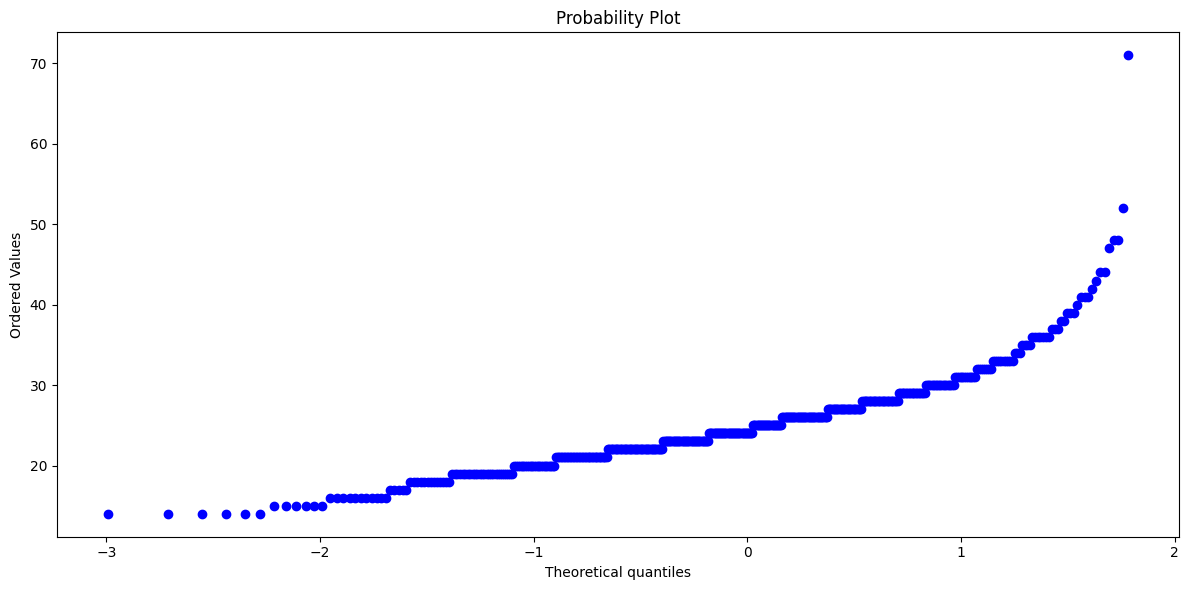

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
stats.probplot(df["Age"].sample(n), plot=ax)

plt.tight_layout()
plt.show()

###

__4) No exercício anterior, construir o intervalo de confiança para a média, com nível de confiança de 95% e erro percentual de 2% (para cima ou para baixo).__

__5) Se uma amostra de tamanho 30, vinda da variável aleatória do exercício 2), tiver uma média 10% maior que a média da população, a hipótese de que essas médias são iguais seria rejeitada ou não rejeitada, com um nível de confiança de 95%? (faça o teste de hipótese para responder essa pergunta).__
